In [1]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [3]:
ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


Normalization: Transform the data so that each variable has a mean of 0 and standard deviation of 1. Use numpy for calculations.

In [8]:
data_array = ninja_data.to_numpy()


means = np.mean(data_array, axis=0)
stds = np.std(data_array, axis=0)


normalized_data = (data_array - means) / stds


normalized_df = pd.DataFrame(normalized_data, columns=ninja_data.columns)


normalized_df.head()

,Time,Temperature,Pressure,Chemical Concentration
0,-1.730320,0.253181,1.445618,-0.206395
1,-1.726856,0.071129,1.469211,-0.187538
2,-1.723391,0.160892,1.376261,0.101115
3,-1.719927,0.346308,1.412828,0.004858
4,-1.716463,0.302865,1.420736,0.170638


In [10]:
ninja_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    1000 non-null   float64
 1   Temperature             1000 non-null   float64
 2   Pressure                1000 non-null   float64
 3   Chemical Concentration  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [12]:
ninja_data.describe()

,Time,Temperature,Pressure,Chemical Concentration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.000000,19.977372,1013.033617,4.989754
std,28.910854,3.574943,14.203350,1.436505
min,0.000000,13.897407,990.284418,2.559310
25%,25.000000,16.386984,998.852247,3.576024
50%,50.000000,20.008666,1012.950967,4.970976
75%,75.000000,23.570373,1027.062114,6.398067
max,100.000000,26.030294,1035.471676,7.486763


In [16]:
correlation_matrix = ninja_data.corr()


correlation_matrix

,Time,Temperature,Pressure,Chemical Concentration
Time,1.000000,-0.770696,-0.001946,-0.156113
Temperature,-0.770696,1.000000,0.007112,-0.003277
Pressure,-0.001946,0.007112,1.000000,-0.000863
Chemical Concentration,-0.156113,-0.003277,-0.000863,1.000000


In [18]:
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(ninja_data['Pressure'], ninja_data['Chemical Concentration'])

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 2232.948614202902
p-value: 0.0


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

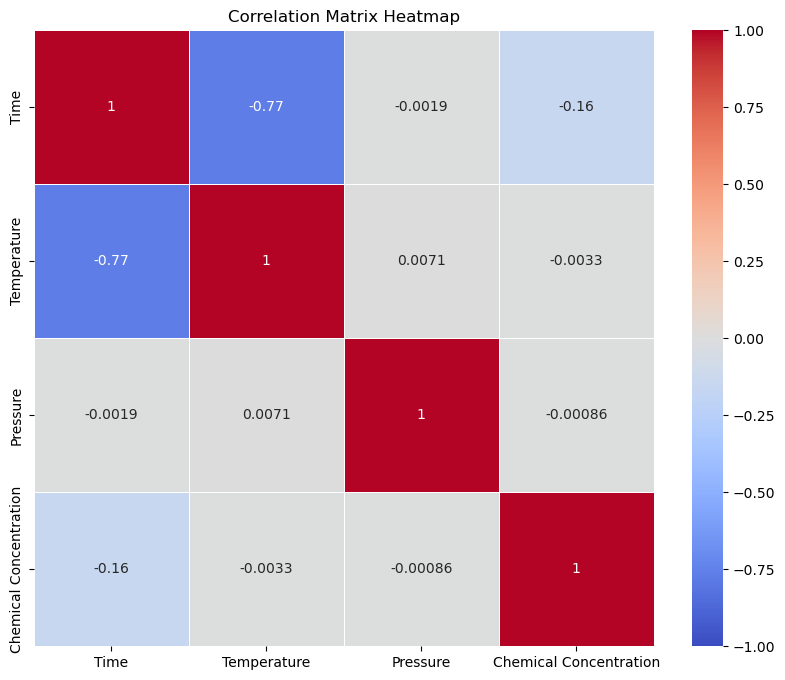

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='white')
plt.title("Correlation Matrix Heatmap")
plt.show()

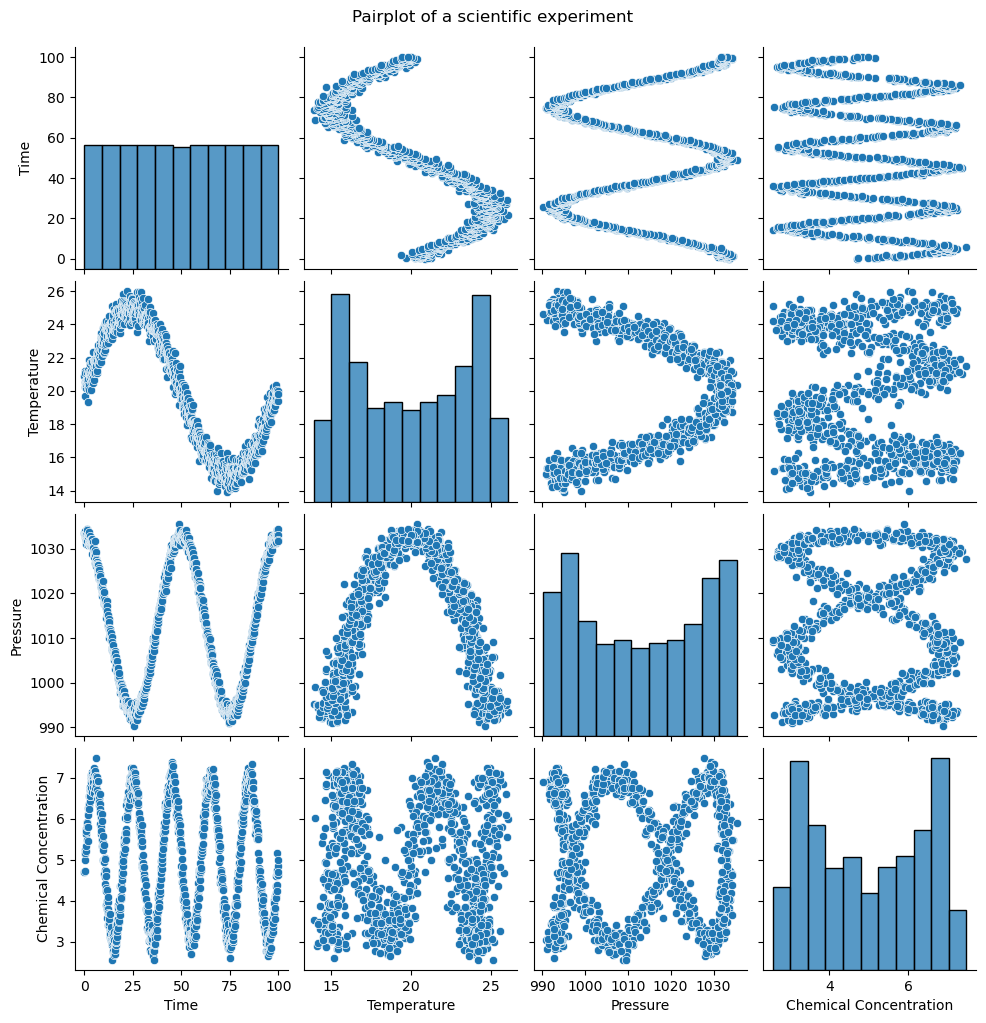

In [26]:
sns.pairplot(ninja_data)
plt.suptitle("Pairplot of a scientific experiment", y=1.02)  # Adjust the title position
plt.show()